In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Loading the data from Excel file
data =pd.read_excel("Eagle data.xlsx")

In [16]:
#Exploring the data structure
data.shape

(718, 9)

In [17]:
data.head()

,S.NO,Brand,Item,Product,Product Model,Date,Invoice No,Customer Name,Amount
0,1,ANDAL,ANDAL,DINING TABLE,5X2 1/2 WOODEN,09-03-2023,SI/TAM/5912,Mrs. JEYATHALA,50000
1,2,BALAN,BALAN,DINING TABLE,4+1,23-01-2023,SI/ADM/14478,MR. GOPALA KLIVE,33400
2,3,BALAN,BALAN,DINING TABLE,4+1 WOODEN,12-03-2023,SI/ADM/16790,MR.K.ARAVIND SATHIYA NARAYANAN,35800
3,4,BASKAR,BASKAR,DINING TABLE,ROUND 1+4,12-02-2023,SI/TAM/5492,"Mr. RAMANATHAN,",35000
4,5,BASKAR,BASKAR,DINING TABLE,WOODEN,17-01-2023,SI/MUV/2740,A.MANIKKAM,24000


In [18]:
data.tail()

,S.NO,Brand,Item,Product,Product Model,Date,Invoice No,Customer Name,Amount
713,714,VIVO,VIVO,SMART PHONE,V25 PRO SAILLING BLUE (8/128GB),29-01-2023,SI/TAM/4687,BAJAJ FINANCE LTD,35999
714,715,VIVO,VIVO,SMART PHONE,V25 PRO SAILLING BLUE (8/128GB),01-02-2023,SI/SPT/2290,IDFC FINANCE LTD,35999
715,716,VIVO,VIVO,SMART PHONE,V25 SURFING BLUE (12/256GB),11-02-2023,SI/TAM/4863,BAJAJ FINANCE LTD,30499
716,717,VIVO,VIVO,SMART PHONE,V25 SURFING BLUE (12/256GB),12-02-2023,SI/TAM/4888,BAJAJ FINANCE LTD,37500
717,718,VIVO,VIVO,SMART PHONE,V25 SURFING BLUE (8/128GB),01-01-2023,SI/GVY/332,SANTHOSH,27999


In [19]:
data.dtypes

S.NO              int64
Brand            object
Item             object
Product          object
Product Model    object
Date             object
Invoice No       object
Customer Name    object
Amount            int64
dtype: object

In [22]:
# Data Cleaning
# Removing unwanted columns
unwanted_col=["S.NO","Item"]
data.drop(unwanted_col,axis=1,inplace=True)

In [23]:
# Data Formatting
#checking for null values
data.isnull().sum()

Brand            0
Product          0
Product Model    0
Date             0
Invoice No       0
Customer Name    1
Amount           0
dtype: int64

In [24]:
#checking for duplicate values
data.duplicated().sum()

0

In [25]:
#dropping the null value
data.dropna(inplace=True)

In [30]:
# Feature Analysis
# Checking unique values in the "Product Category" column
data["Product"].unique()

array(['DINING TABLE', 'WASHING MACHINE', 'REFRIGERATOR', 'SOFA',
       'AIRCONDITIONER', 'SMART PHONE'], dtype=object)

In [31]:
# Checking the number of unique values in the "Product Category" column
data["Product"].nunique()

6

In [27]:
# Add category column
category_data = { 'Product': ['DINING TABLE', 'WASHING MACHINE', 'REFRIGERATOR', 'SOFA', 'AIRCONDITIONER', 'SMART PHONE']}

In [ ]:
# Define the categories
categories = {'DINING TABLE':'Furniture',
    'WASHING MACHINE':'Home Appliance',
    'REFRIGERATOR':'Home Appliance',
    'SOFA':'Furniture',
    'AIRCONDITIONER':'Home Appliance',
    'SMART PHONE':'Mobile and Computer'}

In [ ]:
# Add the category column
data['Category'] = data['Product'].map(categories)

In [32]:
# Checking the number of unique values in the "Product Model" column
data["Product Model"].nunique()

181

In [34]:
# Checking the number of unique customers
data["Customer Name"].nunique()

446

In [35]:
# Checking unique values in the "Brand" column
data["Brand"].unique()

array(['ANDAL', 'BALAN', 'BASKAR', 'EVER GREEN', 'GB MARKETING',
       'NILKAMAL', 'RATHNA', 'SREEVARI', 'SRI OM', 'SRI VARI', 'SUPREME',
       'VILLAGE WOOD', 'WOODNESS', 'BOSCH', 'GODREJ', 'HAIER',
       'KELVINATOR', 'LG', 'SAMSUNG', 'EAGLE', 'EAGLE COMBO OFFER',
       'GENUINE FURNITURE', 'IDECOR', 'NITHYASHREE', 'SHARP', 'RANJITH',
       'BLUE STAR', 'ONE PLUS', 'REALME', 'VIVO'], dtype=object)

In [36]:
# Checking the number of unique values in the "Brand" column
data["Brand"].nunique()

30

In [37]:
# Data Visualization
# Summary statistics of the data
data.describe()

,Amount
count,7.170000e+02
mean,3.772376e+04
std,6.086817e+04
min,2.700000e+03
25%,2.125000e+04
50%,3.300000e+04
75%,4.030000e+04
max,1.097507e+06


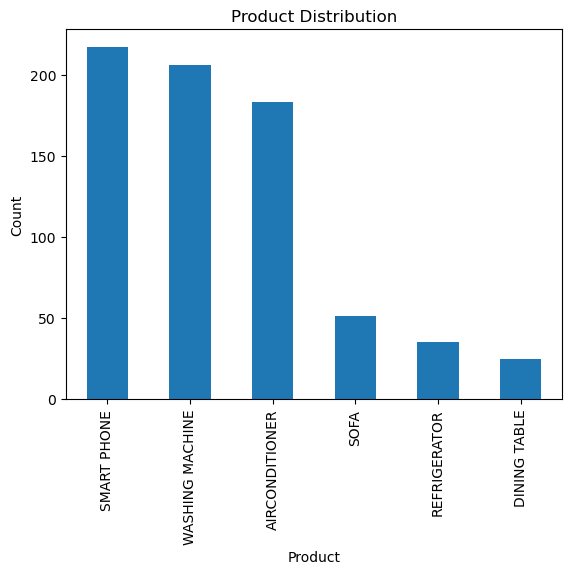

In [38]:
# Plotting the distribution of "Product Category"
data["Product"].value_counts().plot(kind="bar")
plt.title("Product Distribution")
plt.xlabel("Product")
plt.ylabel("Count")
plt.show()

In [39]:
# Calculating correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

        Amount
Amount     1.0


In [41]:
# Converting the date data type 
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [43]:
# Extracting month from the date column
data['OrderMonth'] = data['Date'].dt.month

In [45]:
# Calculate monthly sales
monthly_sales = data.groupby(["OrderMonth"]).sum()["Amount"]
print(monthly_sales)

OrderMonth
1    7106149
2    7223575
3    6104286
4    6613927
Name: Amount, dtype: int64


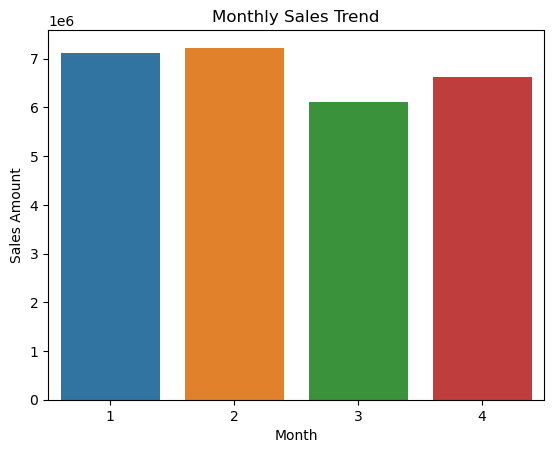

In [46]:
sns.barplot(x='OrderMonth', y='Amount', data=monthly_sales.reset_index())
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales Amount")
plt.show()

In [47]:
# Saving the cleaned data to a CSV file
data.to_csv('Eagle_sales.csv', index=False)